Looked at a few machine learning techniques to determine significant variables for predicting RPI. 
I was playing with ML techniques in general, this might be a train of thought you want to continue. - DB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/danielbillmann/anaconda/envs/intro_to_ds/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_excel('auto_at_large_conferences.xlsx')

In [3]:
df.head(10)

,Team,Conference_ID,Conference,Non D1 W,Non D1 D,Non D1 L,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Tournament,Year
0,West Virginia,6,Big 12,0,0,0,23,2,2,0.8889,0.6457,0.5930,0.7790,0.7093,0.6933,0.7115,2,2016
1,Stanford,21,Pac-12,0,0,0,18,2,1,0.8810,0.6281,0.5871,0.7503,0.6953,0.6811,0.6956,2,2016
2,Southern California,21,Pac-12,0,0,0,19,4,2,0.8000,0.6523,0.5950,0.6632,0.6789,0.6749,0.6933,1,2016
3,South Carolina,23,SEC,0,0,0,21,2,1,0.8958,0.6011,0.5866,0.7543,0.6872,0.6712,0.6833,1,2016
4,North Carolina,4,Atlantic Coast,0,0,0,17,4,4,0.7600,0.6626,0.5991,0.6643,0.6744,0.6711,0.6800,1,2016
5,Georgetown,7,Big East,0,0,0,20,3,3,0.8269,0.6085,0.5670,0.7865,0.6726,0.6528,0.6688,2,2016
6,Florida,23,SEC,0,0,0,17,5,1,0.7609,0.6333,0.5852,0.6572,0.6580,0.6532,0.6645,2,2016
7,UCLA,21,Pac-12,0,0,0,15,5,2,0.7273,0.6419,0.5853,0.7006,0.6578,0.6491,0.6626,1,2016
8,Auburn,23,SEC,0,0,0,17,7,0,0.7083,0.6581,0.5813,0.7115,0.6607,0.6515,0.6615,1,2016
9,BYU,31,WAC,0,0,0,18,3,1,0.8409,0.5820,0.5599,0.6996,0.6541,0.6412,0.6586,2,2016


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 18 columns):
Team             572 non-null object
Conference_ID    572 non-null int64
Conference       572 non-null object
Non D1 W         572 non-null int64
Non D1 D         572 non-null int64
Non D1 L         572 non-null int64
W                572 non-null int64
L                572 non-null int64
D                572 non-null int64
WIN %            572 non-null float64
SOS              572 non-null float64
Opp SOS          572 non-null float64
Road W           572 non-null float64
Road RPI         572 non-null float64
RPI              572 non-null float64
ADJ RPI          572 non-null float64
Tournament       572 non-null int64
Year             572 non-null int64
dtypes: float64(7), int64(9), object(2)
memory usage: 80.5+ KB


In [5]:
#df.head()
#df.info()
#df.describe()

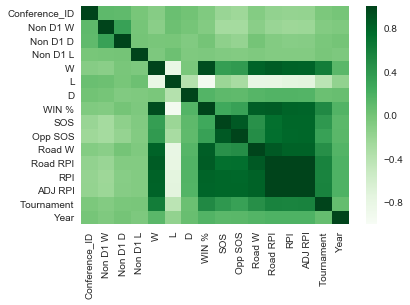

In [6]:
correlations = df.corr()
sns.heatmap(correlations, cmap='Greens')

# American Conference

In [7]:
american = df[(df['Conference_ID']==1)]

# UC 2017 Data

In [28]:
w = 15
d = 4
l = 0
win_per = (w + (.5* d))/(w + d + l)
opp_sos = american['Opp SOS'].mean()
road_w = win_per - .07
road_rpi = (.25 * road_w) + (.5 * sos) + (.25 * opp_sos)
rpi = (win_per* .25)+ (.5 * sos) + (.25 * opp_sos)
adj_rpi = .01 + rpi

In [29]:
teams = ['Buffalo', 'Boston', 'Miami', 'Pittsburgh', 
 'Northwestern', 'Purdue', 'Oakland', 
 'Northern Kentucky', 'Xavier', 'Morehead St.']
avg = []
for team in teams:
    mean_avg = df[(df['Team']==str(team))]['WIN %'].mean()
    avg.append(mean_avg)

In [30]:
Boston = (0.452400 + 0.659172) /2
avg[1] = Boston

In [31]:
avg_win = 0
for i in avg:
    avg_win +=i
avg_win=avg_win/len(avg)
sos = (avg_win + 0.5530)/2

In [32]:
# 2017 Projection for UC Women's soccer, assumed .07 drop for road win & manually adjusted + .01 
rpi_2017_proj = ( ( ((12+(.5*3))/(12+3+4))*.25) + ((sos)*.5) + ((american['Opp SOS'].mean())*.25) )
rpi_2017_adj_proj = rpi_2017_proj+.01
uc_2017_data = [
['Cincinnati','AAC',w,l,d,win_per,sos,opp_sos,road_w,road_rpi,rpi,adj_rpi,2017
]]
UC_2017 = pd.DataFrame(data = uc_2017_data,
                       columns=['Team','Conference','W', 'L', 'D', 'WIN %',
                                'SOS', 'Opp SOS', 'Road W','Road RPI', 'RPI',
                                'ADJ RPI', 'Year'])
UC_2017

,Team,Conference,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Year
0,Cincinnati,AAC,15,0,4,0.894737,0.540973,0.537021,0.824737,0.610926,0.628426,0.638426,2017


# Logistic Regression on Tournament entry

In [33]:
df_at_large = df[df.Tournament !=2]
df_at_large = df_at_large.drop('Team',axis=1)
df_at_large = df_at_large.drop('Conference', axis=1)
df_at_large.head()

,Conference_ID,Non D1 W,Non D1 D,Non D1 L,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI,Tournament,Year
2,21,0,0,0,19,4,2,0.8000,0.6523,0.5950,0.6632,0.6789,0.6749,0.6933,1,2016
3,23,0,0,0,21,2,1,0.8958,0.6011,0.5866,0.7543,0.6872,0.6712,0.6833,1,2016
4,4,0,0,0,17,4,4,0.7600,0.6626,0.5991,0.6643,0.6744,0.6711,0.6800,1,2016
7,21,0,0,0,15,5,2,0.7273,0.6419,0.5853,0.7006,0.6578,0.6491,0.6626,1,2016
8,23,0,0,0,17,7,0,0.7083,0.6581,0.5813,0.7115,0.6607,0.6515,0.6615,1,2016


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#df1 = df.drop('Team', axis=1)
#df1 = df_.drop('Conference', axis=1)
X = df_at_large[['W','D','L', 'WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]
y = df_at_large['Tournament']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log_fit = log.fit(X_train, y_train)

In [40]:
predictions = log.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       0.97      0.86      0.91       159
          1       0.23      0.64      0.34        11

avg / total       0.92      0.84      0.87       170



In [43]:
UC_Test_2017 = UC_2017[['W', 'L', 'D', 'WIN %', 'SOS', 'Opp SOS', 'Road W', 'Road RPI', 'RPI', 'ADJ RPI']]

In [44]:
UC_Test_2017

,W,L,D,WIN %,SOS,Opp SOS,Road W,Road RPI,RPI,ADJ RPI
0,15,0,4,0.894737,0.540973,0.537021,0.824737,0.610926,0.628426,0.638426


# Final Results

In [45]:
uc_predict = log.predict(UC_Test_2017)
print(uc_predict)

[1]
